In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\airline_passengers.csv', index_col=['Month'], parse_dates=True)
df1.index.freq = 'MS'
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df2 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\DailyTotalFemaleBirths.csv', index_col=['Date'], parse_dates=True)
df2.index.freq = 'D'
df2.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


## **Dickey-Fuller test for checking time-series' stationarity**

In [5]:
from statsmodels.tsa.stattools import adfuller

If the p-value is less than **0.05** means that the timeseries is Stationary.

In [6]:
def parse_results(results):
    if results[1] <= 0.05:
        print("Time-series is Stationary")
    else:
        print("Time-series is Non-Stationary")

In [7]:
result1 = adfuller(df1['Thousands of Passengers'])
parse_results(result1)

Time-series is Non-Stationary


In [8]:
result2 = adfuller(df2['Births'])
parse_results(result2)

Time-series is Stationary


## **Granger's causality test for checking time-series' causality**

Here, by causality we means that if a series <tt>A</tt> is dependent on series <tt>B</tt> in some way. That is to say whether changes in series <tt>A</tt> affects in any way to series <tt>B</tt>. Let's load a new dataset to check this out.

In [12]:
df3 = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\samples.csv', index_col=[0], parse_dates=True)
df3.index.freq = 'MS'
df3.head(10)

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
1950-06-01,55,16,19,60
1950-07-01,60,24,24,53
1950-08-01,54,16,33,71
1950-09-01,49,25,44,63
1950-10-01,65,27,60,46


This dataset has 4 series. 'a','b','c' and 'd'. Let's plot these and check whether there any causality exists or not between these series.

<AxesSubplot:>

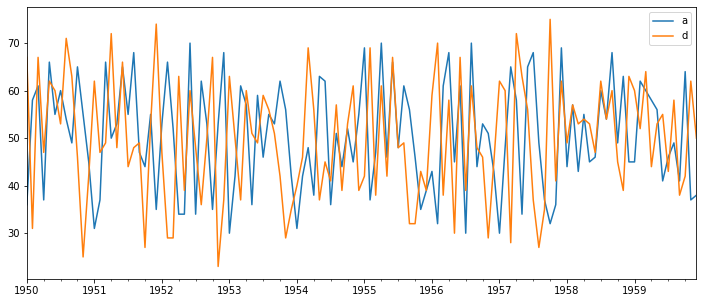

In [11]:
df3[['a','d']].plot(figsize=(12,5))

By looking at the plot, it is very hard to say anything visually. So let's do a Granger's causality test to see quantitavely.

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests

In [16]:
# here maxlag =3. Whatever value we use, system would check from 1 to the maxlag value
grangercausalitytests(df3[['a','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


In the result of <tt>Granger's causality test</tt> what we're looking if the section where p value is minimum **(less than 0.05)**. In this case, this is happening first at lag 2.

Let's now see how the result of series with no causality looks like.

<AxesSubplot:>

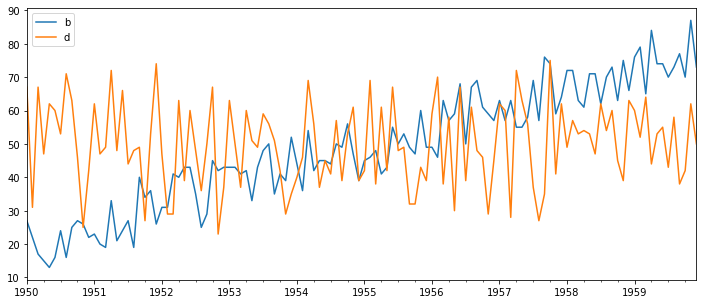

In [18]:
df3[['b','d']].plot(figsize=(12,5))

In [17]:
# 'b' and 'd' are the series with no causality.
grangercausalitytests(df3[['b','d']], maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


We notice that none of the p-values ended up less than **0.05** which is basically a cutoff value for the hypothesis. So the series 'b' and 'd' have no causality.